### 도서 추천
- 도서 요약 --> Feature 변환 --> 코사인 유사도

In [81]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [82]:
df = pd.read_csv('data/books.csv')
df.head(3)

,Unnamed: 0.1,Desc,Unnamed: 0,author,genre,image_link,rating,title
0,0,We know that power is shifting: From West to E...,0.0,Moisés Naím,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.63,The End of Power: From Boardrooms to Battlefie...
1,1,Following the success of The Accidental Billio...,1.0,Blake J. Harris,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.94,"Console Wars: Sega, Nintendo, and the Battle t..."
2,2,How to tap the power of social software and ne...,2.0,Chris Brogan,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.78,Trust Agents: Using the Web to Build Influence...


In [83]:
df.drop(columns=['Unnamed: 0.1','Unnamed: 0'],inplace=True)
df.head(3)

,Desc,author,genre,image_link,rating,title
0,We know that power is shifting: From West to E...,Moisés Naím,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.63,The End of Power: From Boardrooms to Battlefie...
1,Following the success of The Accidental Billio...,Blake J. Harris,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.94,"Console Wars: Sega, Nintendo, and the Battle t..."
2,How to tap the power of social software and ne...,Chris Brogan,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.78,Trust Agents: Using the Web to Build Influence...


In [84]:
df.shape

(2382, 6)

In [85]:
df.Desc[0]

"We know that power is shifting: From West to East and North to South, from presidential palaces to public squares, from once formidable corporate behemoths to nimble startups and, slowly but surely, from men to women. But power is not merely shifting and dispersing. It is also decaying. Those in power today are more constrained in what they can do with it and more at risk of losing it than ever before. In The End of Power, award-winning columnist and former Foreign Policy editor Moisés Naím illuminates the struggle between once-dominant megaplayers and the new micropowers challenging them in every field of human endeavor. Drawing on provocative, original research, Naím shows how the antiestablishment drive of micropowers can topple tyrants, dislodge monopolies, and open remarkable new opportunities, but it can also lead to chaos and paralysis. Naím deftly covers the seismic changes underway in business, religion, education, within families, and in all matters of war and peace. Example

#### 2. 데이터 전처리

In [86]:
# 결측치
df.isna().sum().sum()

0

In [87]:
# 중복 데이터
df.title.nunique()

2378

In [88]:
df.Desc.nunique()

2361

In [89]:
# 중복데이터 제거
df.drop_duplicates(subset=['title'],inplace=True)
df.drop_duplicates(subset=['Desc'],inplace=True)
df.shape

(2359, 6)

In [90]:
# 인덱스 정리
df.set_index('title', inplace=True)
df.reset_index(inplace=True)
df.tail(3)

,title,Desc,author,genre,image_link,rating
2356,The Day of the Triffids,In 1951 John Wyndham published his novel The D...,John Wyndham,Non-Fiction,https://i.gr-assets.com/images/S/compressed.ph...,4.02
2357,A Good Man is Hard to Find and Other Stories,This now classic book revealed Flannery O'Conn...,Flannery O'Connor,Non-Fiction,https://i.gr-assets.com/images/S/compressed.ph...,4.22
2358,Angela's Ashes,Imbued on every page with Frank McCourt's asto...,Frank McCourt,Non-Fiction,https://i.gr-assets.com/images/S/compressed.ph...,4.11


3. Feature 변환

In [91]:
# 저자와 장르 필드의 공백 제거
df.author = df.author.str.replace(' ', '')
df.genre = df.genre.str.replace(' ', '')

In [92]:
df['total'] = df.Desc + (' ' + df.author)*2 + (' ' + df.genre)*3

In [93]:
from sklearn.feature_extraction.text import CountVectorizer
cvect = CountVectorizer(stop_words='english')
total_cv = cvect.fit_transform(df.total)
total_cv

<2359x29146 sparse matrix of type '<class 'numpy.int64'>'
	with 202577 stored elements in Compressed Sparse Row format>

In [94]:
indicies = pd.Series(df.index, index=df.title)

#### 4. 코사인 유사도

In [95]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity = cosine_similarity(total_cv)

In [96]:
def get_recommendation(title, cos_sim):
    index = indicies[title]
    sim_scores = pd.Series(cos_sim[index])
    movie_indices = sim_scores.sort_values(ascending=False).head(11).tail(10).index
    return df.title.iloc[indicies]

#### 5. 추천도서 이미지 출력

In [97]:
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO

In [98]:
results = get_recommendation('The Da Vinci Code', cosine_similarity)
results

0       The End of Power: From Boardrooms to Battlefie...
1       Console Wars: Sega, Nintendo, and the Battle t...
2       Trust Agents: Using the Web to Build Influence...
3                           The Four Pillars of Investing
4                     Made in Japan: Akio Morita and Sony
                              ...                        
2354                                             Insomnia
2355                               Murder at the Vicarage
2356                              The Day of the Triffids
2357         A Good Man is Hard to Find and Other Stories
2358                                       Angela's Ashes
Name: title, Length: 2359, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

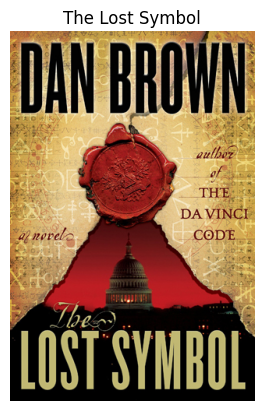

In [100]:
index = 1276
response = requests.get(df.image_link[index])
img = Image.open(BytesIO(response.content))
plt.imshow(img), plt.axis('off')
plt.title(df.title[index])
plt.show

ValueError: num must be an integer with 1 <= num <= 10, not 11

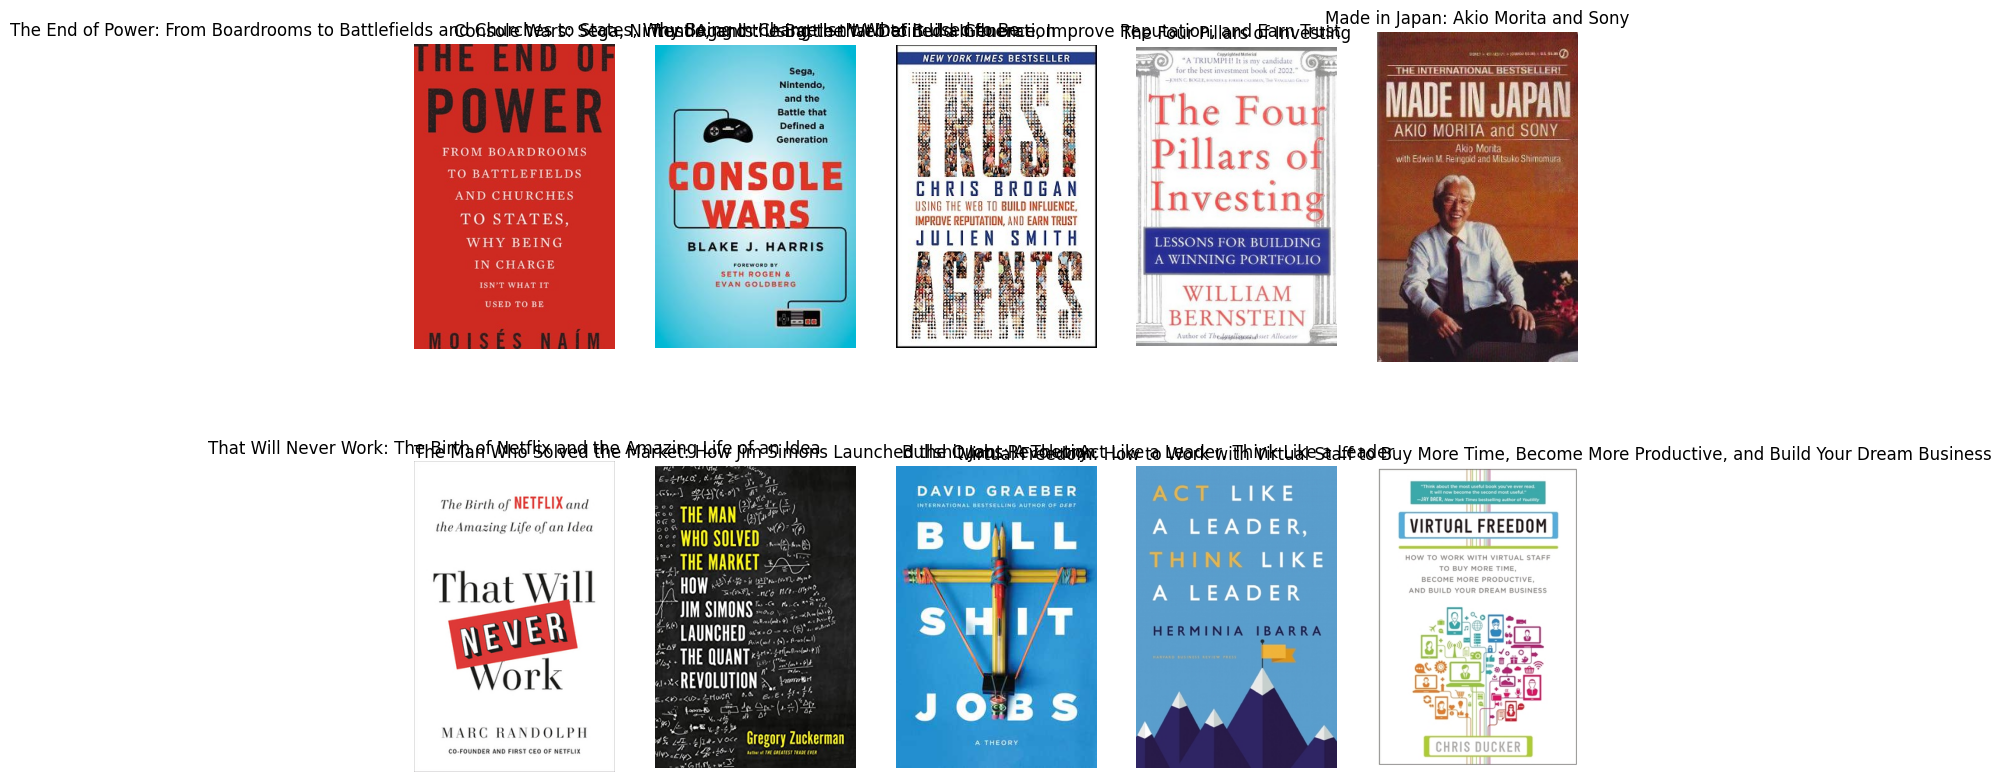

In [103]:
plt.figure(figsize=(15,10))
for i, index in enumerate(results.index):
    response = requests.get(df.image_link[index])
    img = Image.open(BytesIO(response.content))
    plt.subplot(2,5,i+1)
    plt.imshow(img), plt.axis('off')
    plt.title(df.title[index])
plt.show()